In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
#Load Test and Training Data
test_data = pd.read_csv(r"C:\Users\Greig\Documents\Uni\5th year\CS 986\Assignment\CS98XRegressionTest.csv")
train_data = pd.read_csv(r"C:\Users\Greig\Documents\Uni\5th year\CS 986\Assignment\CS98XRegressionTrain.csv")

In [3]:
train_data.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [4]:
#Obseravtion of Training Dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
Id           453 non-null int64
title        453 non-null object
artist       453 non-null object
top genre    438 non-null object
year         453 non-null int64
bpm          453 non-null int64
nrgy         453 non-null int64
dnce         453 non-null int64
dB           453 non-null int64
live         453 non-null int64
val          453 non-null int64
dur          453 non-null int64
acous        453 non-null int64
spch         453 non-null int64
pop          453 non-null int64
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [5]:
train_data.isnull().sum()

Id            0
title         0
artist        0
top genre    15
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [6]:
#Drop rows where genre is missing. Only 15 were missing out of 453 so dropping 15 shouldn't have a huge effect on the dataset
train_data = train_data.dropna()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 0 to 452
Data columns (total 15 columns):
Id           438 non-null int64
title        438 non-null object
artist       438 non-null object
top genre    438 non-null object
year         438 non-null int64
bpm          438 non-null int64
nrgy         438 non-null int64
dnce         438 non-null int64
dB           438 non-null int64
live         438 non-null int64
val          438 non-null int64
dur          438 non-null int64
acous        438 non-null int64
spch         438 non-null int64
pop          438 non-null int64
dtypes: int64(12), object(3)
memory usage: 54.8+ KB


In [7]:
train_data.tail()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
448,449,But Not For Me,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4,45
449,450,Surf City,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3,50
450,451,Dilemma,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14,77
451,452,It's Gonna Be Me,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8,62
452,453,In The Army Now,Status Quo,album rock,2002,105,73,68,-8,14,94,281,11,2,59


In [8]:
train_data['top genre'].value_counts()

adult standards           68
album rock                66
dance pop                 61
brill building pop        16
glam rock                 16
europop                   14
dance rock                13
boy band                  10
british invasion           8
art rock                   7
disco                      7
bubblegum dance            7
eurodance                  6
barbadian pop              6
deep adult standards       6
atl hip hop                6
classic soul               5
pop                        5
soft rock                  5
british soul               5
east coast hip hop         4
doo-wop                    4
classic uk pop             4
disco house                3
g funk                     3
new wave pop               3
chicago soul               2
canadian pop               2
country rock               2
merseybeat                 2
                          ..
italian pop                1
drone folk                 1
hip pop                    1
alternative ro

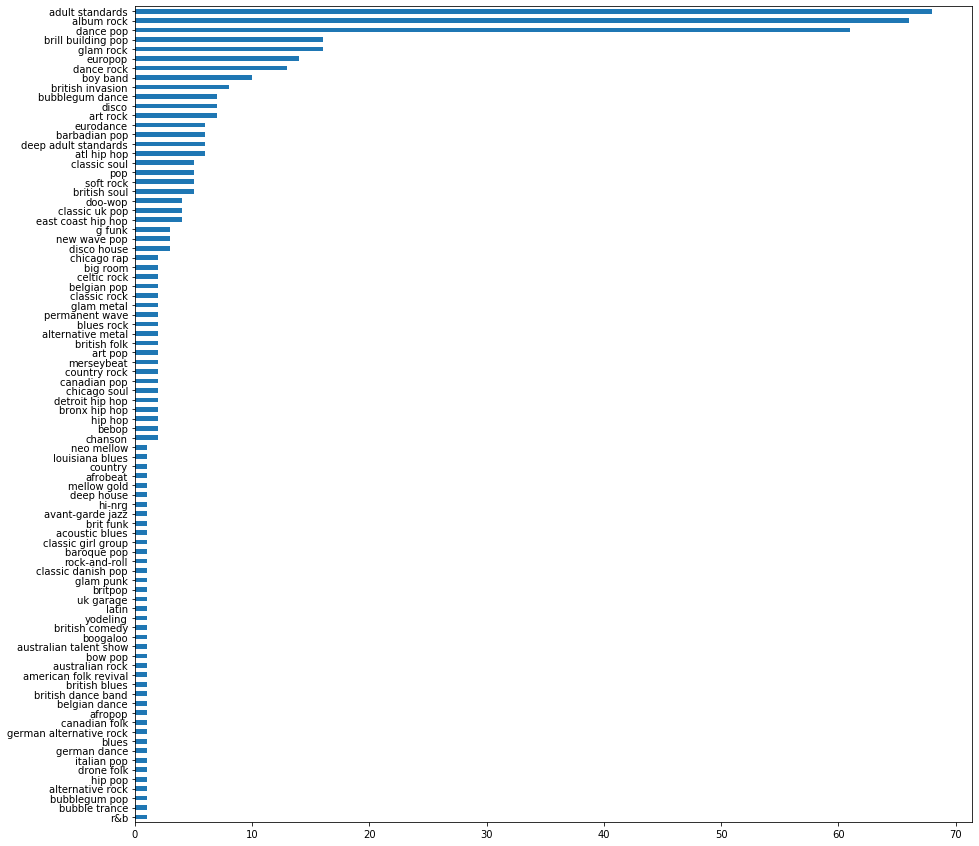

In [9]:
train_data['top genre'].value_counts().sort_values().plot.barh(figsize = (15,15))

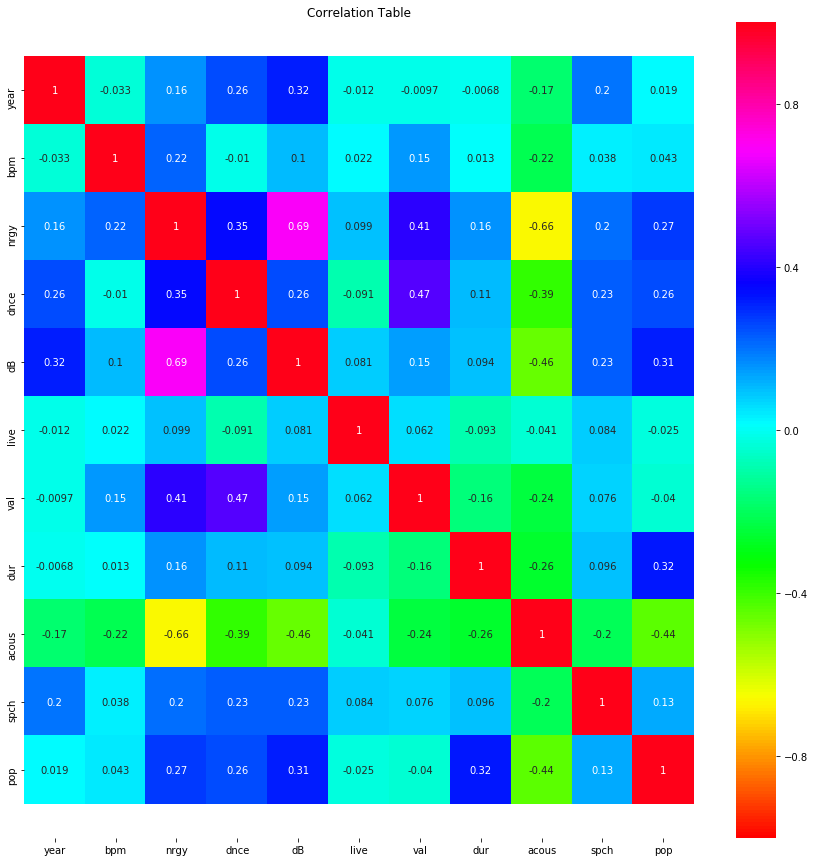

In [10]:
#Correlation table of audio features. As you can see below the features have very little correlation so we will use all of them.
corr = train_data.iloc[:, 4:].corr()
figure(figsize=(15,15))
ax = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'hsv')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Table')
#plt.savefig('C:\\Users\\Inno Mvula\\Desktop\\correlation table.png', bbox_inches='tight')
plt.show()

In [11]:
train_data.tail()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
448,449,But Not For Me,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4,45
449,450,Surf City,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3,50
450,451,Dilemma,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14,77
451,452,It's Gonna Be Me,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8,62
452,453,In The Army Now,Status Quo,album rock,2002,105,73,68,-8,14,94,281,11,2,59


In [12]:
#Creating the dependent variable class and encoding
factor = pd.factorize(train_data['top genre'])
train_data['top genre'] = factor[0]
definitions = factor[1]
print(train_data['top genre'].head())
print(definitions)

0    0
2    0
3    0
4    1
5    2
Name: top genre, dtype: int64
Index(['adult standards', 'glam rock', 'pop', 'album rock', 'boy band',
       'brill building pop', 'rock-and-roll', 'country rock', 'canadian pop',
       'dance pop', 'europop', 'bebop', 'art rock', 'disco', 'blues',
       'barbadian pop', 'deep adult standards', 'deep house', 'atl hip hop',
       'dance rock', 'disco house', 'bubblegum dance', 'classic soul',
       'classic uk pop', 'east coast hip hop', 'doo-wop', 'britpop',
       'british blues', 'soft rock', 'australian talent show', 'art pop',
       'british soul', 'british invasion', 'belgian pop', 'big room',
       'german dance', 'italian pop', 'british folk', 'brit funk',
       'chicago soul', 'neo mellow', 'british comedy', 'hip hop',
       'new wave pop', 'eurodance', 'detroit hip hop', 'classic rock',
       'uk garage', 'afrobeat', 'r&b', 'chicago rap', 'classic danish pop',
       'british dance band', 'drone folk', 'permanent wave', 'merseybeat',

In [13]:
#Extracting features and Target
#Splitting the data into independent and dependent variables
X = train_data.iloc[:, 4:14].values
Y = train_data.iloc[:, 14].values
print('The independent features set: ')
print(X[:5,:])
print('The dependent variable: ')
print(Y[:5])

The independent features set: 
[[1996  107   31   45   -8   13   28  150   75    3]
 [1979  105   36   63   -9   13   67  245   11    3]
 [1980  170   28   47  -16   13   33  232   25    3]
 [1973  121   47   56   -8   15   40  193   45    3]
 [2010  110   56   71   -7   12   23  223   15    6]]
The dependent variable: 
[44 77 67 63 74]


In [14]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [15]:
#Here we will use he random over sampling technique to balance the dataset. Matches minority class to that of the majority class

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_train_over, y_train_over = ros.fit_sample(X, Y)

In [16]:
#Creating the Training and Test set from data
X_train, X_test, Y_train, Y_test = train_test_split(x_train_over, y_train_over, test_size = 0.20, random_state = 42, stratify = y_train_over)

In [17]:
len(X_train)

896

In [18]:
import collections
print(collections.Counter(Y_train))

Counter({62: 16, 59: 16, 53: 16, 77: 16, 75: 16, 31: 16, 78: 16, 67: 16, 57: 16, 34: 16, 73: 16, 64: 16, 71: 16, 41: 16, 36: 16, 69: 16, 56: 16, 55: 16, 47: 16, 74: 16, 54: 16, 65: 16, 63: 16, 26: 16, 30: 16, 79: 16, 66: 16, 32: 16, 70: 16, 44: 16, 35: 16, 40: 16, 38: 16, 37: 16, 61: 16, 33: 16, 46: 16, 81: 16, 68: 16, 52: 16, 51: 16, 82: 16, 50: 16, 39: 16, 76: 16, 72: 16, 42: 16, 58: 16, 83: 16, 45: 16, 48: 16, 43: 16, 84: 16, 80: 16, 49: 16, 60: 16})


In [19]:
len(collections.Counter(Y_train))

56

In [20]:
#Here we have selected several parameters we would like to tune to get optimal values in each that improve our model
#parameters = {"max_features":, "max_depth":, "min_samples_split":, 'criterion':, 'class_weight':}
df = DecisionTreeClassifier()
max_feat = []
max_dep = []
mss = []
crit = ['gini', 'entropy']
cweight = ['balanced', None]
for i in range(1, 11, 1):
    max_feat.append(i)
max_feat.append(None)
for l in range(2, 16, 2):
    max_dep.append(l)
for m in range(10, 110, 10):
    mss.append(m)
max_dep.append(None)
parameters = {
    "max_features": max_feat,
    "max_depth": max_dep,
    "min_samples_split": mss,
    'criterion': crit,
    'class_weight': cweight
    
}
print(parameters)

{'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'max_depth': [2, 4, 6, 8, 10, 12, 14, None], 'min_samples_split': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'criterion': ['gini', 'entropy'], 'class_weight': ['balanced', None]}


In [21]:
#Here we use GridSearch to hypertune our parameters to get optimal values. Gridsearch iterates through all the values
#set for each parameter and returns the best ones
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(df, parameters, cv = 5)
cv.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': ['balanced', None],
                 

In [22]:
#Function used to print out different parameter combinations and their scores for the base classifier
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean, std, params in zip(mean_score, std_score, params):
        if round(mean,3) >= 0.96:
            print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [23]:
display(cv)

Best parameters are: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 14, 'max_features': 7, 'min_samples_split': 10}




In [24]:
#Selection of parameters for main classifier in addition to updating the values of the base classifier parameters
tree_clf = DecisionTreeClassifier(max_depth = 14, max_features = 10, min_samples_split = 10, class_weight = 'balanced',
                                 criterion = 'entropy')
ab = AdaBoostClassifier(tree_clf)
num_est = []
lrn_rate = []
for i in range(5, 100, 5):
    num_est.append(i)
for l in range(1, 11, 1):
    lrn_rate.append(l/10)
parameters2 = {
    "n_estimators":num_est,
    "learning_rate": lrn_rate
    
}
print(parameters2)

{'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95], 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}


In [25]:
#hyperparameter tuning of main classifier
from sklearn.model_selection import GridSearchCV
cv2 = GridSearchCV(ab, parameters2, cv = 5)
cv2.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight='balanced',
                                                                                criterion='entropy',
                                                                                max_depth=14,
                                                                                max_features=10,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf

In [26]:
#Function used to print out different parameter combinations and their scores for the main classifier
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score, std_score, params):
        if round(mean,3) >= 0.983:
            print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [27]:
display(cv2)

Best parameters are: {'learning_rate': 1.0, 'n_estimators': 45}




In [28]:
#Train and fit our model using the recommended values for our parameters
adb = AdaBoostClassifier(tree_clf, n_estimators = 95, algorithm = "SAMME.R", learning_rate = 0.8)
adb.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=14,
                                                         max_features=10,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=10,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                 

In [29]:
#evaluation
Y_pred = adb.predict(X_test)
#Reverse factorize
reversefactor = dict(zip(range(86),definitions))
Y_test = np.vectorize(reversefactor.get)(Y_test)
Y_pred = np.vectorize(reversefactor.get)(Y_pred)
# Making the Confusion Matrix
print(pd.crosstab(Y_test, Y_pred, rownames=['Actual genres'], colnames=['Predicted genres']))

Predicted genres         acoustic blues  afrobeat  afropop  alternative metal  \
Actual genres                                                                   
acoustic blues                        4         0        0                  0   
afrobeat                              0         4        0                  0   
afropop                               0         0        4                  0   
alternative metal                     0         0        0                  2   
american folk revival                 0         0        0                  0   
art pop                               0         0        0                  0   
australian rock                       0         0        0                  0   
avant-garde jazz                      0         0        0                  0   
baroque pop                           0         0        0                  0   
belgian dance                         0         0        0                  0   
belgian pop                 

In [30]:
#print a classification report depicting the precision, recall, and f1-score of t=the different classes and overall model
from sklearn.metrics import classification_report
class_rep_adb = classification_report(Y_test, Y_pred)
print(class_rep_adb)

                         precision    recall  f1-score   support

         acoustic blues       1.00      1.00      1.00         4
               afrobeat       0.80      1.00      0.89         4
                afropop       0.67      1.00      0.80         4
      alternative metal       1.00      0.50      0.67         4
  american folk revival       0.80      1.00      0.89         4
                art pop       1.00      1.00      1.00         4
        australian rock       0.50      0.75      0.60         4
       avant-garde jazz       1.00      1.00      1.00         4
            baroque pop       1.00      1.00      1.00         4
          belgian dance       0.67      0.50      0.57         4
            belgian pop       1.00      1.00      1.00         4
               big room       1.00      1.00      1.00         4
             blues rock       1.00      1.00      1.00         4
               boogaloo       1.00      0.50      0.67         4
                bow pop 

In [31]:
# predicting test data results
test_data.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,454,Pump It,The Black Eyed Peas,dance pop,2005,154,93,65,-3,75,74,213,1,18
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,glam rock,1994,161,39,30,-15,11,14,292,26,3
2,456,We Are The Champions - Remastered 2011,Queen,glam rock,1977,64,46,27,-7,12,18,179,38,3
3,457,Insomnia - Radio Edit,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4
4,458,This Eve of Parting,John Hartford,appalachian folk,2018,115,46,56,-12,21,34,153,18,3


In [32]:
#Extracting our features from the test data and predicting their genres
X1 = test_data.iloc[:, 4:14].values
test_data['top genre'] = adb.predict(X1)
test_data['top genre'] = np.vectorize(reversefactor.get)(test_data['top genre'])

In [33]:
test_data.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,454,Pump It,The Black Eyed Peas,chanson,2005,154,93,65,-3,75,74,213,1,18
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,bubble trance,1994,161,39,30,-15,11,14,292,26,3
2,456,We Are The Champions - Remastered 2011,Queen,r&b,1977,64,46,27,-7,12,18,179,38,3
3,457,Insomnia - Radio Edit,Faithless,chanson,2010,127,92,71,-9,37,53,216,6,4
4,458,This Eve of Parting,John Hartford,r&b,2018,115,46,56,-12,21,34,153,18,3


In [34]:
test_data['top genre'].value_counts()

classic girl group       10
g funk                    7
bubble trance             7
chanson                   6
yodeling                  6
celtic rock               5
canadian folk             5
r&b                       4
boogaloo                  4
country                   4
baroque pop               4
brit funk                 4
australian rock           4
afropop                   3
belgian dance             3
blues rock                3
drone folk                3
glam metal                3
bubblegum pop             3
uk garage                 3
afrobeat                  2
american folk revival     2
chicago soul              2
latin                     2
bronx hip hop             2
permanent wave            2
hi-nrg                    1
british soul              1
mellow gold               1
british comedy            1
art pop                   1
avant-garde jazz          1
hip pop                   1
belgian pop               1
classic rock              1
classic danish pop  

In [35]:
#saving predictions as a csv for submission on kaggle
prediction = test_data[['Id', 'top genre']]
prediction.to_csv("adb14_submission.csv", index=False)
prediction

,Id,top genre
0,454,chanson
1,455,bubble trance
2,456,r&b
3,457,chanson
4,458,r&b
5,459,country
6,460,belgian dance
7,461,uk garage
8,462,boogaloo
9,463,g funk
